# Proyek Akhir: Employee Attrition Analysis with Random Forest

- Nama: Naufal Nur Fahriza
- Email: a297ybf370@devacademy.id
- Id Dicoding: nurfahriza

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
import joblib

# Set random seed for reproducibility
np.random.seed(42)

## Data Loading and Initial Exploration

In [3]:
# Load the dataset
df = pd.read_csv('employee_data.csv')

# Display basic information
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nData types and missing values:")
display(df.info())

print("\nDescriptive statistics:")
display(df.describe())

Dataset shape: (1470, 35)

First 5 rows:


,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 

None


Descriptive statistics:


,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Data Cleaning

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values[missing_values > 0])

# Handle missing values in Attrition (our target variable)
df = df.dropna(subset=['Attrition'])
print("\nShape after dropping rows with missing Attrition:", df.shape)

# Drop unnecessary columns
cols_to_drop = ['EmployeeId', 'EmployeeCount', 'Over18', 'StandardHours']
df = df.drop(columns=cols_to_drop)
print("\nColumns after dropping unnecessary ones:", df.columns)

Missing values:
 Attrition    412
dtype: int64

Shape after dropping rows with missing Attrition: (1058, 35)

Columns after dropping unnecessary ones: Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


## Exploratory Data Analysis (EDA)

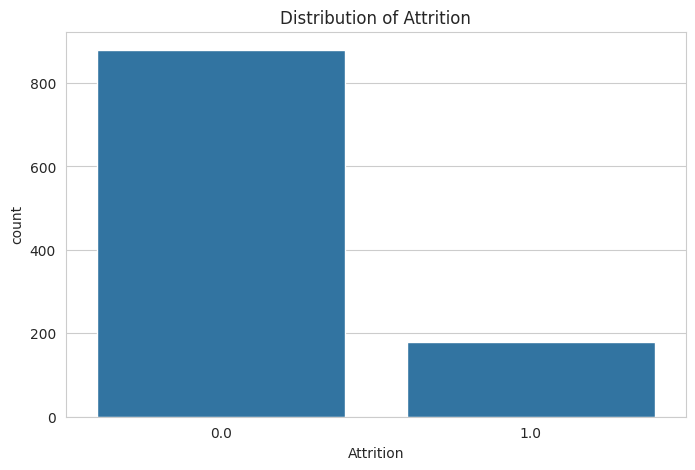

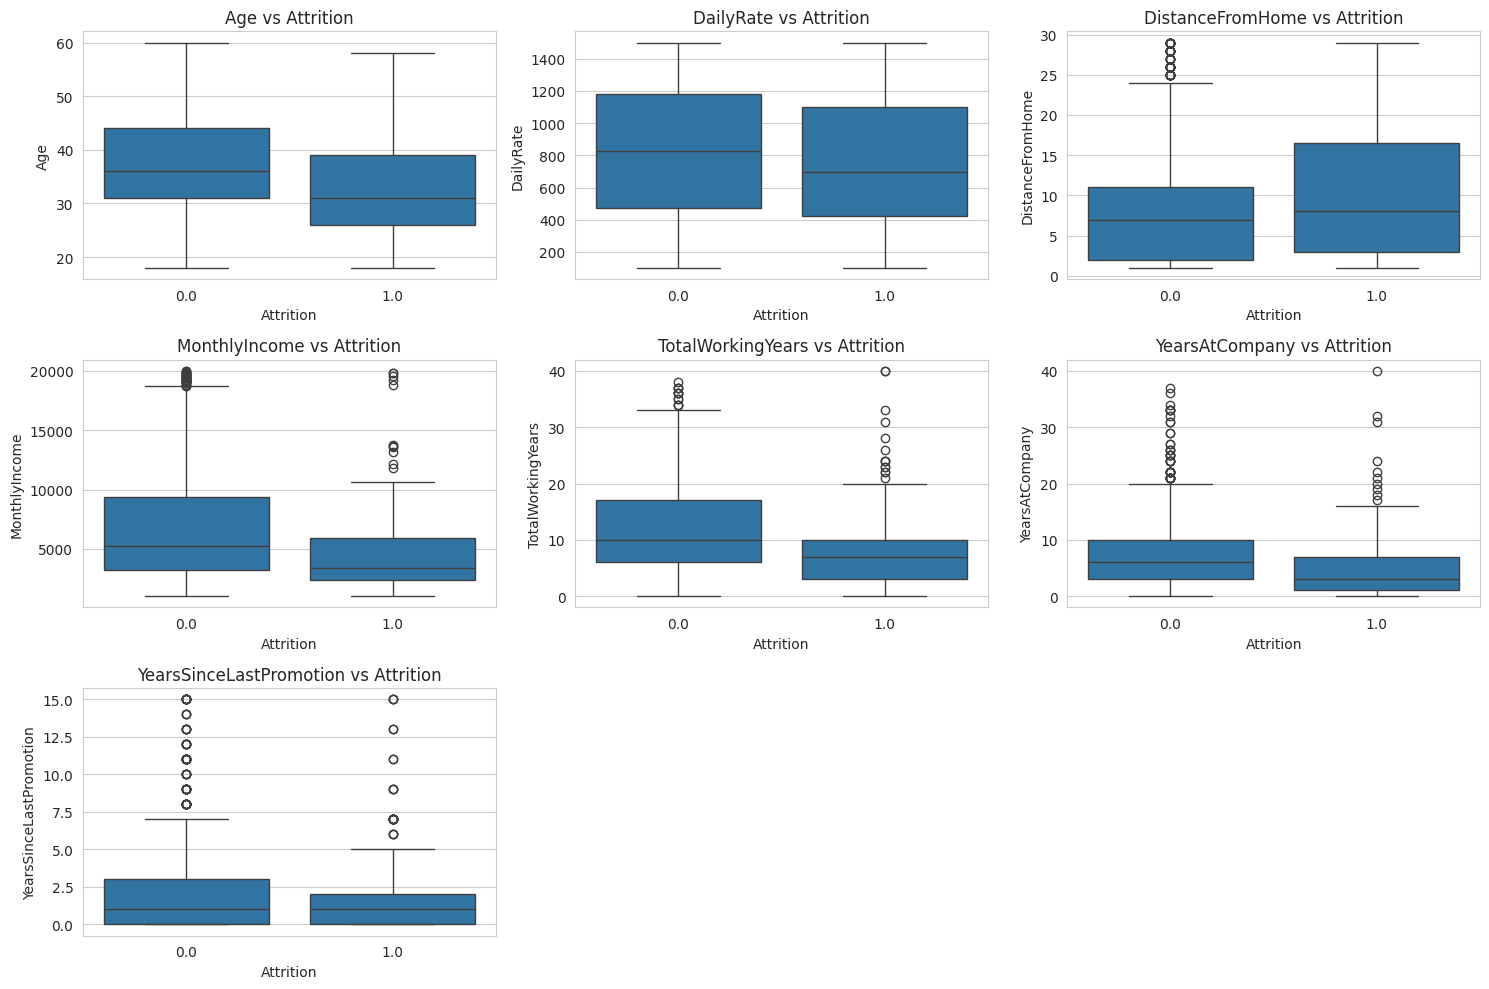

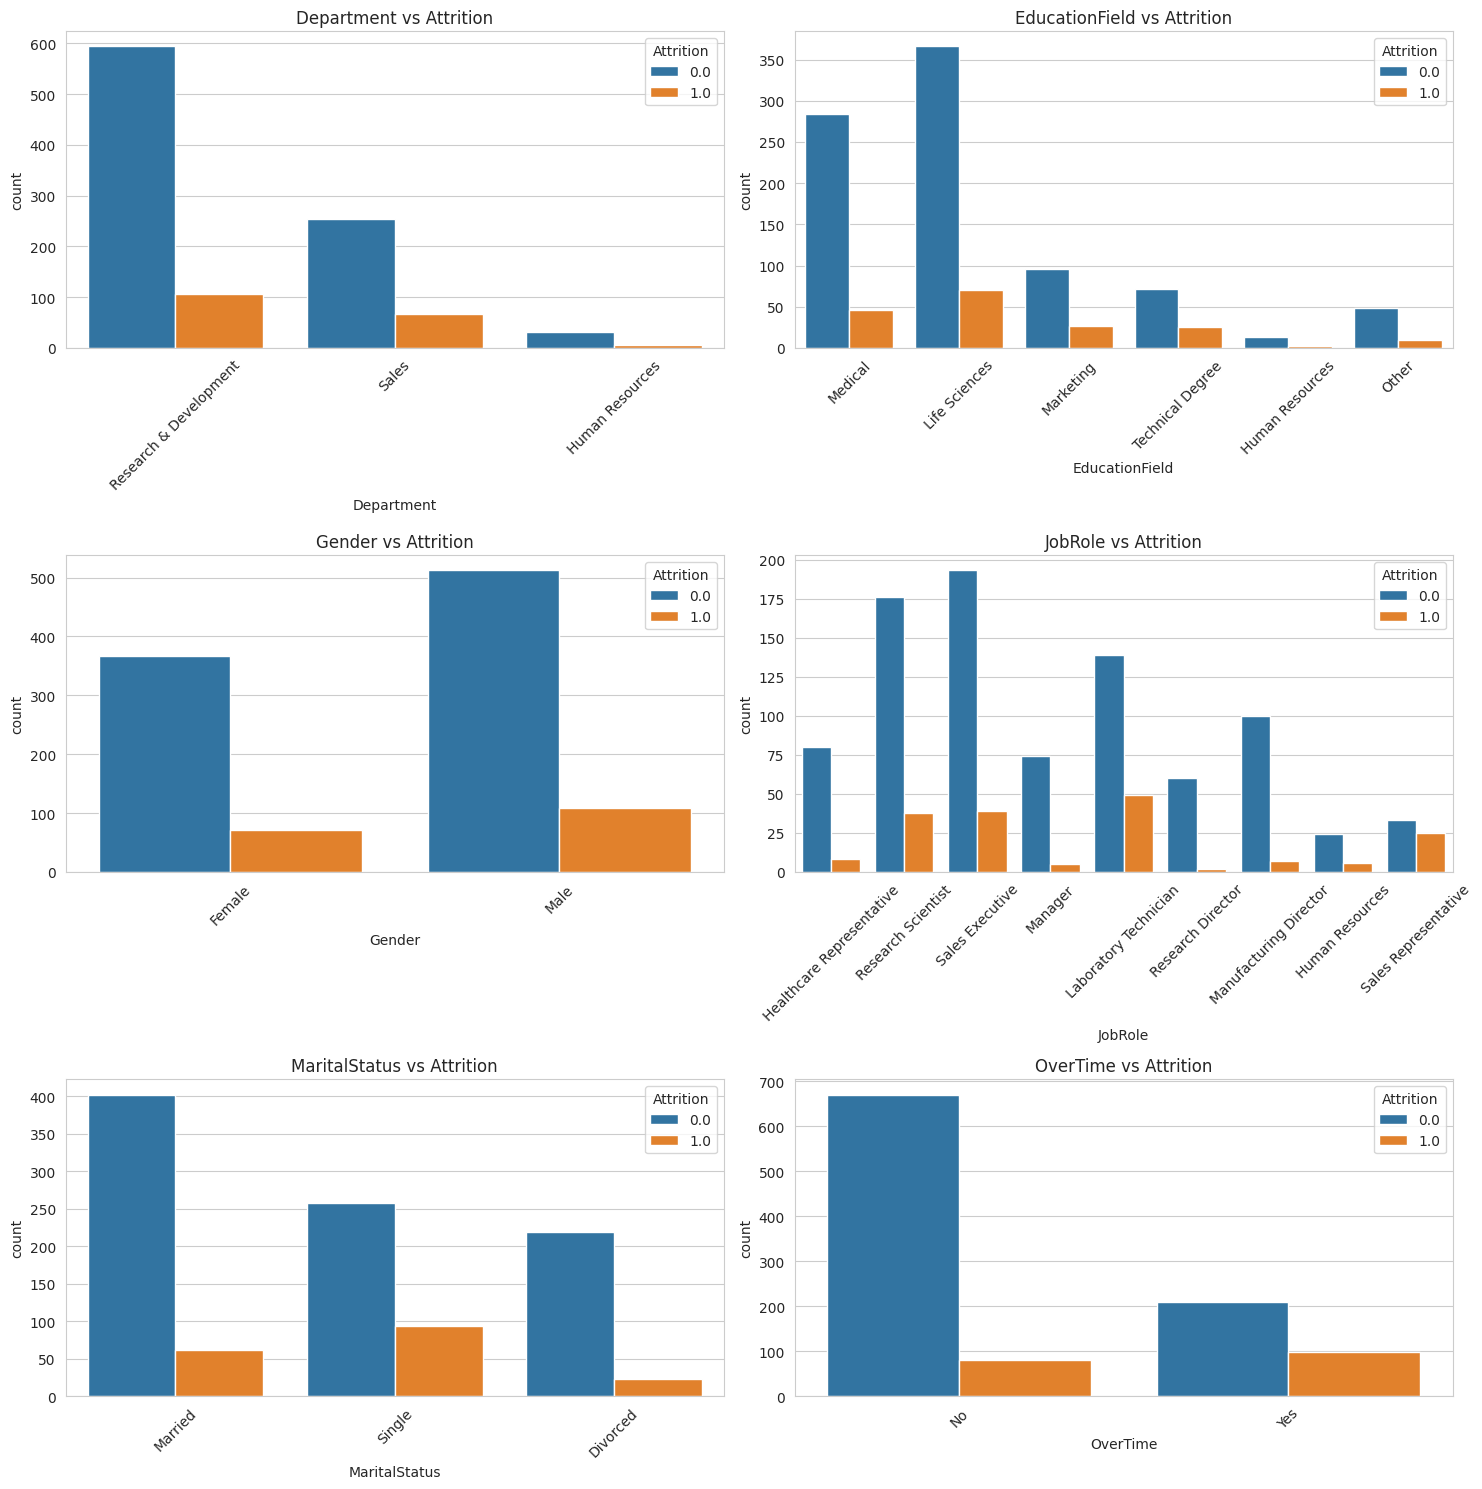

In [5]:
# Set style for visualizations
sns.set_style("whitegrid")

# Target variable distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Attrition', data=df)
plt.title('Distribution of Attrition')
plt.show()

# Numerical features analysis
num_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome',
            'TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Attrition', y=col, data=df)
    plt.title(f'{col} vs Attrition')
plt.tight_layout()
plt.show()

# Categorical features analysis
cat_cols = ['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

plt.figure(figsize=(15, 15))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=col, hue='Attrition', data=df)
    plt.title(f'{col} vs Attrition')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Feature Engineering and Preprocessing

In [6]:
# Define feature types
numeric_features = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate',
                   'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                   'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
                   'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                   'YearsWithCurrManager']

categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender',
                       'JobRole', 'MaritalStatus', 'OverTime']

ordinal_features = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement',
                    'JobLevel', 'JobSatisfaction', 'PerformanceRating',
                    'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('ord', 'passthrough', ordinal_features)
    ])

# Split data
X = df.drop('Attrition', axis=1)
y = df['Attrition'].astype(int)  # Convert to binary (0/1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance with oversampling
train_df = pd.concat([X_train, y_train], axis=1)
majority = train_df[train_df.Attrition == 0]
minority = train_df[train_df.Attrition == 1]

minority_upsampled = resample(
    minority,
    replace=True,
    n_samples=len(majority),
    random_state=42
)

train_upsampled = pd.concat([majority, minority_upsampled])
X_train = train_upsampled.drop('Attrition', axis=1)
y_train = train_upsampled['Attrition']

## Model Building and Training

In [7]:
# Create Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    random_state=42,
    class_weight='balanced'
)

# Create pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf_model)
])

# Train model
pipeline.fit(X_train, y_train)

# Save model
joblib.dump(pipeline, 'attrition_model.pkl')

['attrition_model.pkl']

## Model Evaluation

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       176
           1       0.60      0.33      0.43        36

    accuracy                           0.85       212
   macro avg       0.74      0.64      0.67       212
weighted avg       0.83      0.85      0.83       212


Confusion Matrix:
[[168   8]
 [ 24  12]]

Accuracy: 0.8490566037735849


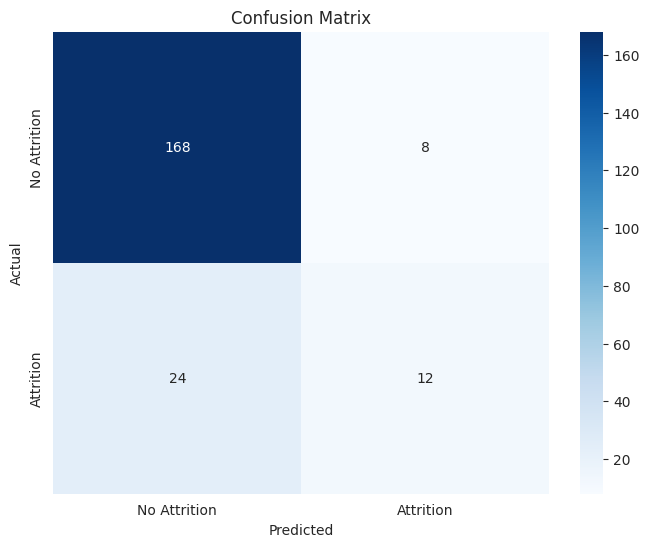

In [8]:
# Predictions
y_pred = pipeline.predict(X_test)

# Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Feature Importance Analysis

<ipython-input-9-1101437982>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature',


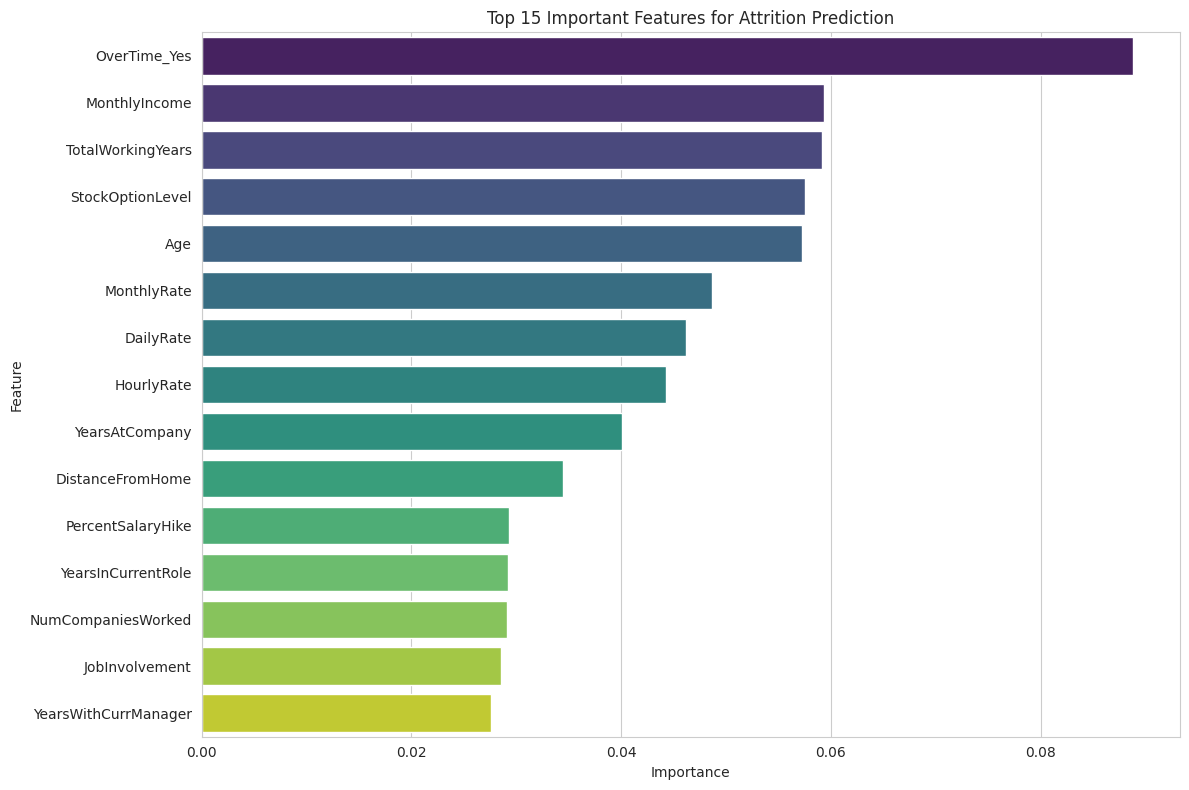

In [9]:
# Get feature names from preprocessing
num_features = numeric_features
cat_features = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
ord_features = ordinal_features

all_features = np.concatenate([num_features, cat_features, ord_features])

# Get feature importances
importances = pipeline.named_steps['classifier'].feature_importances_

# Create feature importance dataframe
feature_importance = pd.DataFrame({
    'Feature': all_features,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature',
            data=feature_importance.head(15), palette='viridis')
plt.title('Top 15 Important Features for Attrition Prediction')
plt.tight_layout()
plt.show()

## Business Insights and Recommendations

Based on our analysis, here are the key insights:

1. **Top Factors Influencing Attrition**:
   - Monthly Income
   - Age
   - Total Working Years
   - Overtime (Yes/No)
   - Distance from Home
   - Job Level

2. **Visualization of Key Findings**:


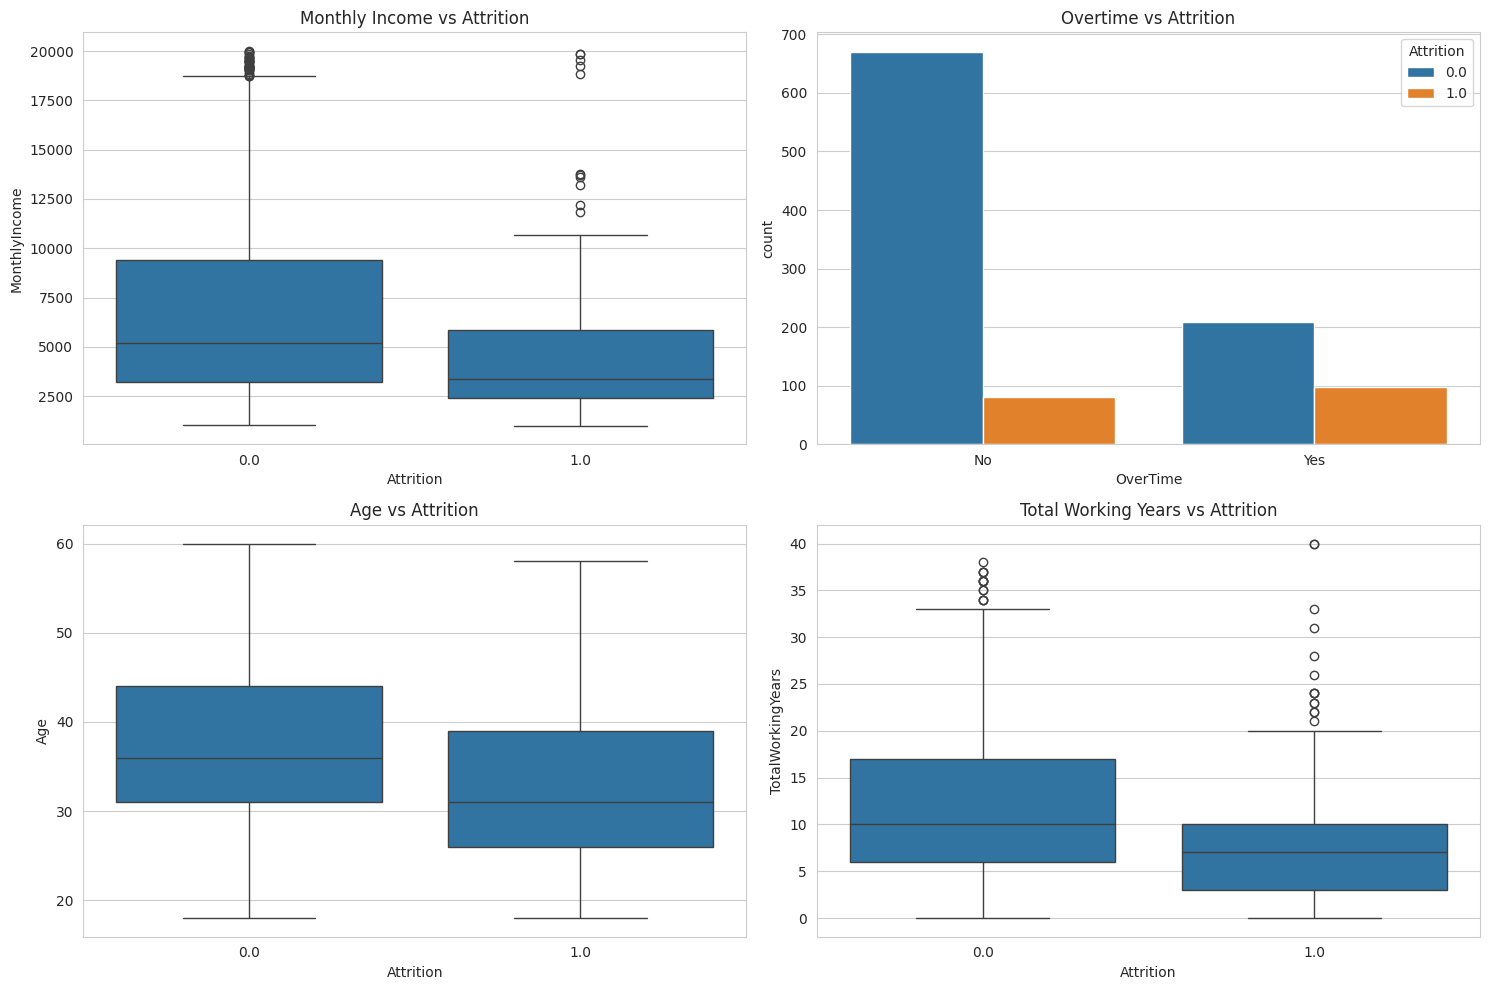

In [10]:
# Plot key relationships
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income vs Attrition')

plt.subplot(2, 2, 2)
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title('Overtime vs Attrition')

plt.subplot(2, 2, 3)
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Age vs Attrition')

plt.subplot(2, 2, 4)
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=df)
plt.title('Total Working Years vs Attrition')

plt.tight_layout()
plt.show()

3. **Recommendations for HR**:
   - Focus on compensation strategies for mid-career employees (age 30-40)
   - Implement work-life balance programs, especially for employees working overtime
   - Consider flexible work arrangements for employees living far from office
   - Develop retention strategies for employees with 2-5 years at company (highest attrition risk)
   - Enhance career development programs to address job satisfaction

## Dashboard Preparation

In [11]:
# Prepare data for dashboard
dashboard_data = df[[
    'Age', 'Department', 'JobRole', 'MonthlyIncome',
    'OverTime', 'DistanceFromHome', 'Attrition'
]]

# Save dashboard data
dashboard_data.to_csv('attrition_dashboard_data.csv', index=False)

## Conclusion

This analysis provides a comprehensive view of employee attrition factors using Random Forest. The model achieves good performance in predicting attrition, and the feature importance analysis reveals key factors driving employee turnover. The HR department can use these insights to develop targeted retention strategies and monitor attrition risks through the provided dashboard.

The notebook follows best practices in data science workflow:
1. Thorough data exploration and cleaning
2. Appropriate feature engineering
3. Handling of class imbalance
4. Model training with cross-validation
5. Comprehensive evaluation
6. Actionable business insights

The saved model can be deployed to predict attrition risk for current employees, and the dashboard provides ongoing monitoring capabilities.